<a href="https://colab.research.google.com/github/Jimeens/PGF5393_IA/blob/main/Atividade3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade 3

Lucas R. Ximenes dos Santos - 11917239

---

O objetivo dessa atividade é criar uma rede neural que possa ser treinada, usando apenas as 21 low-level features, para separar o sinal do fundo.

## Análise exploratória

Vamos primeiro importar os dados que iremos utilizar. Como o arquivo que contém os dados é grande (69.6 MB), ele foi adicionado no drive e importado no Google Colab usando a biblioteca `gdown`. Os dados originais serão armazenados na variável `dados`.

In [19]:
import gdown
import pandas as pd

file = {
    'filename': 'HIGGS_100k.csv',
    "file_id" : "1mrzlmpPh4copC7ZULocAGhA1xAep88Sy"
}

url = f"https://drive.google.com/uc?id={file['file_id']}"
gdown.download(url, file['filename'], quiet=True)
print(f'{file['filename']} baixado com sucesso e armazenado em "dados".')

dados = pd.read_csv('HIGGS_100k.csv')

HIGGS_100k.csv baixado com sucesso e armazenado em "dados".


Antes de começar, vamos renomear os atributos apropriadamente, dado que eles estão originalmente nomeados como números, o que torna a análise mais complicada. Como informado na proposta da atividade, as colunas em ordem são: `class label`, `lepton pT`, `lepton eta`, `lepton phi`, `missing energy magnitude`, `missing energy phi`, `jet 1 pt`, `jet 1 eta`, `jet 1 phi`, `jet 1 b-tag`, `jet 2 pt`, `jet 2 eta`, `jet 2 phi`, `jet 2 b-tag`, `jet 3 pt`, `jet 3 eta`, `jet 3 phi`, `jet 3 b-tag`, `jet 4 pt`, `jet 4 eta`, `jet 4 phi`, `jet 4 b-tag`, `m_jj`, `m_jjj`, `m_lv`, `m_jlv`, `m_bb`, `m_wbb` e `m_wwbb`, portanto serão estes os nomes atribuidos a cada variável.

In [20]:
names = {
    '1.000000000000000000e+00': 'class label',
    '8.692932128906250000e-01': 'lepton pT',
    '-6.350818276405334473e-01': 'lepton eta',
    '2.256902605295181274e-01': 'lepton phi',
    '3.274700641632080078e-01': 'missing energy magnitude',
    '-6.899932026863098145e-01': 'missing energy phi',
    '7.542022466659545898e-01': 'jet 1 pt',
    '-2.485731393098831177e-01': 'jet 1 eta',
    '-1.092063903808593750e+00': 'jet 1 phi',
    '0.000000000000000000e+00': 'jet 1 b-tag',
    '1.374992132186889648e+00': 'jet 2 pt',
    '-6.536741852760314941e-01': 'jet 2 eta',
    '9.303491115570068359e-01': 'jet 2 phi',
    '1.107436060905456543e+00': 'jet 2 b-tag',
    '1.138904333114624023e+00': 'jet 3 pt',
    '-1.578198313713073730e+00': 'jet 3 eta',
    '-1.046985387802124023e+00': 'jet 3 phi',
    '0.000000000000000000e+00.1': 'jet 3 b-tag',
    '6.579295396804809570e-01': 'jet 4 pt',
    '-1.045456994324922562e-02': 'jet 4 eta',
    '-4.576716944575309753e-02': 'jet 4 phi',
    '3.101961374282836914e+00': 'jet 4 b-tag',
    '1.353760004043579102e+00': 'm_jj',
    '9.795631170272827148e-01': 'm_jjj',
    '9.780761599540710449e-01': 'm_lv',
    '9.200048446655273438e-01': 'm_jlv',
    '7.216574549674987793e-01': 'm_bb',
    '9.887509346008300781e-01': 'm_wbb',
    '8.766783475875854492e-01': 'm_wwbb',
}

dados.rename(columns=names, inplace=True)

Como procedimento padrão, verifiquemos se existem dados faltantes e analisemos as características principais de cada um dos atributos.

In [21]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   class label               100000 non-null  float64
 1   lepton pT                 100000 non-null  float64
 2   lepton eta                100000 non-null  float64
 3   lepton phi                100000 non-null  float64
 4   missing energy magnitude  100000 non-null  float64
 5   missing energy phi        100000 non-null  float64
 6   jet 1 pt                  100000 non-null  float64
 7   jet 1 eta                 100000 non-null  float64
 8   jet 1 phi                 100000 non-null  float64
 9   jet 1 b-tag               100000 non-null  float64
 10  jet 2 pt                  100000 non-null  float64
 11  jet 2 eta                 100000 non-null  float64
 12  jet 2 phi                 100000 non-null  float64
 13  jet 2 b-tag               100000 non-null  fl

In [22]:
dados.describe()

,class label,lepton pT,lepton eta,lepton phi,missing energy magnitude,missing energy phi,jet 1 pt,jet 1 eta,jet 1 phi,jet 1 b-tag,...,jet 4 eta,jet 4 phi,jet 4 b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.528330,0.990366,-0.003806,-0.001636,0.995061,-0.007612,0.987112,-0.003017,0.000441,0.998344,...,-0.007598,-0.004017,0.992690,1.032607,1.023150,1.050193,1.010197,0.973076,1.031874,0.959203
std,0.499199,0.561840,1.004840,1.006190,0.595359,1.006996,0.473120,1.008705,1.008427,1.027402,...,1.009200,1.007096,1.396776,0.652454,0.371611,0.164857,0.398275,0.523557,0.363395,0.313258
min,0.000000,0.274697,-2.434976,-1.742508,0.001283,-1.743944,0.139976,-2.968735,-1.741237,0.000000,...,-2.497265,-1.742691,0.000000,0.110875,0.303144,0.133012,0.295983,0.048125,0.303350,0.350939
25%,0.000000,0.590936,-0.741244,-0.868047,0.575656,-0.881465,0.676336,-0.688483,-0.867542,0.000000,...,-0.725017,-0.877028,0.000000,0.791306,0.846627,0.985775,0.767261,0.673789,0.819170,0.769964
50%,1.000000,0.854835,-0.002976,0.000971,0.890283,-0.011024,0.892163,-0.000025,-0.003822,1.086538,...,-0.010455,-0.009698,0.000000,0.895600,0.950707,0.989742,0.917302,0.874004,0.947037,0.871038
75%,1.000000,1.236776,0.735292,0.868220,1.290881,0.865868,1.167809,0.683233,0.871223,2.173076,...,0.710770,0.869386,3.101961,1.025914,1.083218,1.020762,1.141654,1.139816,1.139032,1.057479
max,1.000000,7.805887,2.433894,1.743236,7.998711,1.743229,7.064657,2.969674,1.741454,2.173076,...,2.498009,1.743372,3.101961,18.428827,10.038273,4.565248,7.442589,11.994177,7.318191,6.015647


É evidente que todos os dados estão em uma mesma escala de valores, então *a priori* não será necessário nenhum tipo de reescalonamento. O foco é utilizar apenas os atributos entitulados *low-level*, então separaremos os 29 atributos em 3 conjuntos: o que contém apenas a variável alvo, que é a `class label`, o que contém os 21 atributos *low-level* e os 7 restantes que são os atributos *high-level*.

In [23]:
classLabel = dados.iloc[:, 0]
lowLevel = dados.iloc[:, 1:22]
highLevel = dados.iloc[:, 22:29]

Como são muitos dados (100.000), é interessante verificar se eles estão balanceados, isto é, se a quantidade de dados com `class label == 1` e semelhante à quantidade de dados com `class label == 0`.

In [24]:
print("Distribuição das classes:")
print(classLabel.value_counts(normalize=True) * 100)  # Em percentual

Distribuição das classes:
class label
1.0    52.833
0.0    47.167
Name: proportion, dtype: float64


Temos então um conjunto de dados bem balanceado, como esperado, dado que estes foram utilizados no artigo original, com $\approx 53\%$ dos dados classificados como sinal (`class label == 1`) e $\approx 47\%$ classificados como fundo (`class label == 0`). Podemos então separar os dados em conjuntos de treino, validação e teste para treinar a rede neural. Faremos uma separação de $60\%$ para treino, validação $15\%$ e $25\%$ para teste. E para reprodutibilidade, utilizaremos um `random_state == 42`.

In [25]:
from sklearn.model_selection import train_test_split
import numpy as np

trainRatio = 0.6
validationRatio = 0.15
testRatio = 0.25

randomState = 42

X = lowLevel
y = classLabel

XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size = 1 - trainRatio, stratify = y, random_state = randomState)
XVal, XTest, yVal, yTest = train_test_split(XTest, yTest, test_size = testRatio/(testRatio + validationRatio), stratify = yTest, random_state = randomState)

Uma verificação importante a se fazer com os dados é sobre o comportamento dos atributos em relação às ocorrências, isto é, a frequência de eventos. Para o conjunto de dados de treino que iremos utilizar (`XTrain`), podemos fazer o plot dos 21 atributos *low-level* com base na quantidade de dados separados em sinal e fundo, e verificar o comportamento destes em relação à frequência dos eventos.

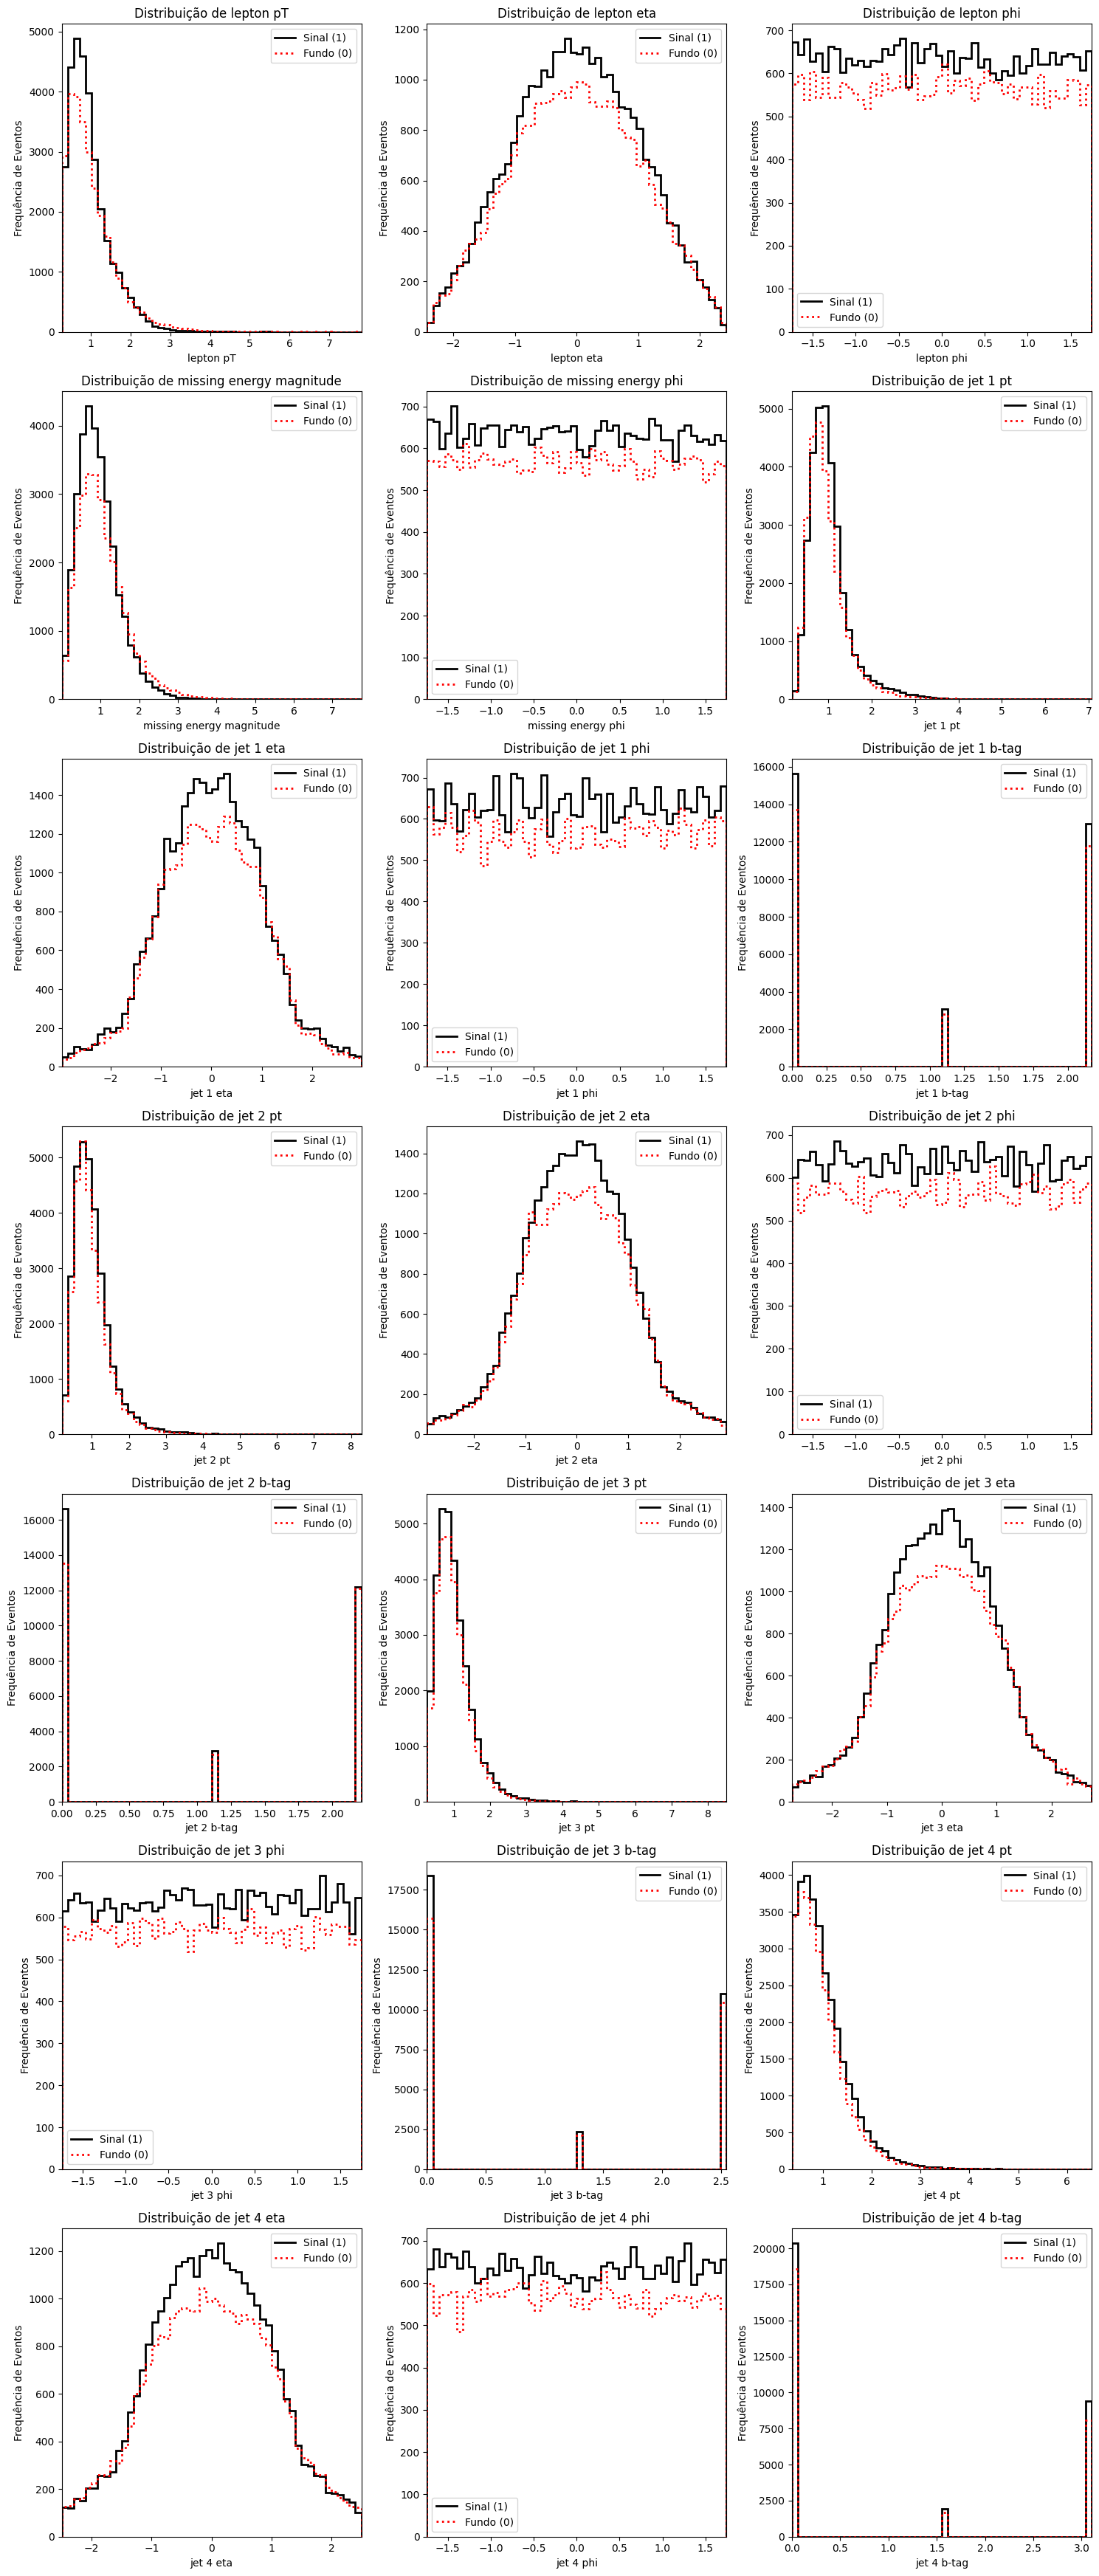

In [26]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

lowLevelWL = XTrain.copy()
lowLevelWL['class label'] = classLabel

fig, axs = plt.subplots(7, 3, figsize=(15, 35))
axs = axs.flatten()

for i, feature in enumerate(lowLevel.columns):
    data1 = lowLevelWL[lowLevelWL['class label'] == 1][feature]
    data0 = lowLevelWL[lowLevelWL['class label'] == 0][feature]

    min_all = min(data1.min(), data0.min())
    max_all = max(data1.max(), data0.max())

    bins = np.linspace(min_all, max_all, 51)

    axs[i].hist(data1, histtype='step', linewidth=2, color='black', label='Sinal (1)', bins=bins, density=False)
    axs[i].hist(data0, histtype='step', linewidth=2, color='red', linestyle='dotted', label='Fundo (0)', bins=bins, density=False)

    axs[i].set_title(f'Distribuição de {feature}')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Frequência de Eventos')
    axs[i].legend()

    legend_elements = [
        Line2D([0], [0], color='black', linewidth=2, label='Sinal (1)'),
        Line2D([0], [0], color='red', linewidth=2, linestyle='dotted', label='Fundo (0)')
    ]
    axs[i].legend(handles=legend_elements)

    axs[i].set_xlim(min_all, max_all)

plt.tight_layout()
plt.show()

Podemos ver então alguns comportamentos que se repetem em relação a alguns atributos (o que é de certa forma esperado, dado o nome de alguns deles). É possível então separar os atributos em 4 tipos de comportamento:
- Comportamento similar ao de uma curva da forma $axe^{-x}$, com $a$ constante (não necessariamente essa função, mas muito similar):
  - `lepton pT`, `missing energy magnitude`, `jet 1 pt`, `jet 2 pt`, `jet 3 pt` e `jet 4 pt`;
- Comportamento mais uniforme uniforme, similar a uma curva $y=a$, com $a$ constante:
  - `lepton phi`, `missing energy phi`, `jet 1 phi`, `jet 2 phi`, `jet 3 phi` e `jet 4 phi`;
- Comportamento similar a uma gaussiana $ae^{-x^{2}}$, com $a$ constante:
  - `lepton eta`, `jet 1 eta`, `jet 2 eta`, `jet 3 eta` e `jet 4 eta`;
- Comportamento  de "picos":
  - `jet 1 b-tag`, `jet 2 b-tag`, `jet 3 b-tag` e `jet 4 b-tag`.

Estes comportamentos distintos implicam em cinemáticas distintas do conjunto de dados, permitindo mais informações físicas a serem interpretadas. É interessante agora verificar se os atributos em questão possuem alguma correlação forte, para caso exista, lidarmos com isto (mesmo que neste caso a correlação é inesperada, dados que os atributos são atributos físicos independentes).

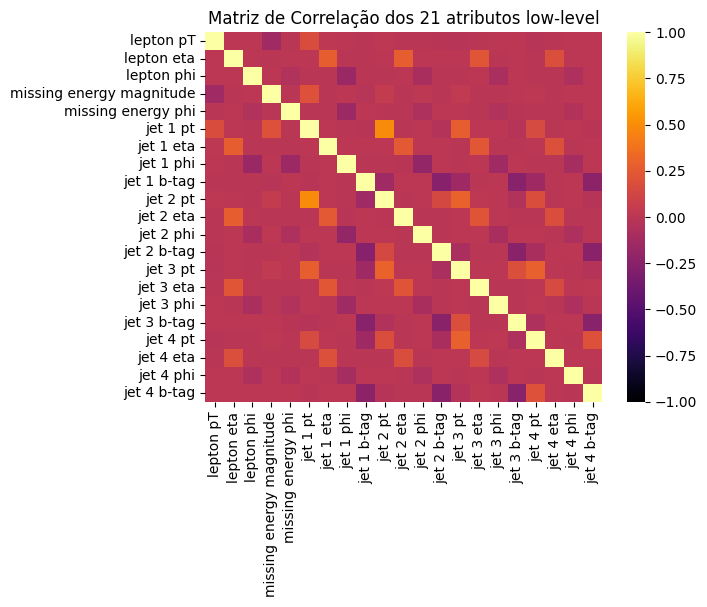

In [27]:
import seaborn as sns

corr_matrix = XTrain.corr()

sns.heatmap(corr_matrix, annot=False, cmap='inferno', vmin=-1, vmax=1)
plt.title('Matriz de Correlação dos 21 atributos low-level')
plt.show()

Vemos então, conforme o esperado, que os atributos não possuem nenhuma correlação muito forte, o que faz com que não precisemos lidar com esse tipo de problema. Por fim, podemos verificar a presença de *outliers* no conjunto de dados completo (se não houver no conjunto todo, logo não há nos conjuntos de treino, validação e teste). Consideraremos valores potencialmente descritos como *outliers* aqueles cujo módulo da diferença entre o valor $x$ e a média $\mu$ forem maior do que 3 vezes o desvio padrão do atributo, isto é $|x - \mu| > 3\sigma$.

In [28]:
lowDesc = lowLevel.describe()
outliers = (lowLevel > lowDesc.loc['mean'] + 3 * lowDesc.loc['std']) | (lowLevel < lowDesc.loc['mean'] - 3 * lowDesc.loc['std'])
print("Contagem de outliers potenciais por atributo:")
print(outliers.sum())

Contagem de outliers potenciais por atributo:
lepton pT                   1480
lepton eta                     0
lepton phi                     0
missing energy magnitude    1279
missing energy phi             0
jet 1 pt                    1965
jet 1 eta                      0
jet 1 phi                      0
jet 1 b-tag                    0
jet 2 pt                    1615
jet 2 eta                      0
jet 2 phi                      0
jet 2 b-tag                    0
jet 3 pt                    1388
jet 3 eta                      0
jet 3 phi                      0
jet 3 b-tag                    0
jet 4 pt                    1481
jet 4 eta                      0
jet 4 phi                      0
jet 4 b-tag                    0
dtype: int64


Levando em consideração que o conjunto de dados inteiro possui 100.000 dados, a quantidade de valores que podem possivelmente ser *outliers* é muito menor, então podemos desconsiderar o tratamento de *outliers* nos dados.

## Construção da Rede Neural

Feita a pré-análise, podemos partir para criação da rede neural e seu treinamento. O pacote escolhido para isso vai ser o `Keras`. Feitos alguns testes com algumas redes de perceptrons, a melhor opção foi uma rede de 5 camadas, onde 3 delas vão ter 64 perceptrons com função de ativação `relu`, uma vai ter 32 perceptrons, também com ativação `relu` e uma camada final com um único perceptron com ativação `sigmoid`. Para compilar, utilizaremos a opção de otimizador `adam`, a função perda `binary_crossentropy`, dado que nosso alvo consiste de resultados 0 ou 1 e a métrica vai ser de acurácia. A fim de evitar *overfitting*, usaremos um `callback` definido pela função `EarlyStopping`, que vai interromper o treinamento quando a perda voltar a subir ao invés de continuar decrescendo. Utilizaremos também 50 Epochs e um `batch_size` de 32, para manter a rede o mais simples possível.

In [29]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

model = keras.Sequential([
    layers.Input(shape=(len(lowLevel.columns),)),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

earlyStop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(XTrain, yTrain, epochs=50, batch_size=32, validation_data=(XVal, yVal), callbacks=[earlyStop], verbose=1)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5333 - loss: 0.6917 - val_accuracy: 0.5763 - val_loss: 0.6721
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.5735 - loss: 0.6745 - val_accuracy: 0.5960 - val_loss: 0.6633
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.5918 - loss: 0.6676 - val_accuracy: 0.6010 - val_loss: 0.6593
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6020 - loss: 0.6610 - val_accuracy: 0.6092 - val_loss: 0.6534
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6061 - loss: 0.6554 - val_accuracy: 0.6113 - val_loss: 0.6533
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6138 - loss: 0.6533 - val_accuracy: 0.6143 - val_loss: 0.6564
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6121 - loss: 0.6516 - val_accuracy: 0.6187 - val_loss: 0.6493
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6133 - loss: 0.6504 -

Feito o treinamento da rede, podemos salvar a acurácia final obtida.

In [30]:
test_loss, test_acc = model.evaluate(XTest, yTest)
print(f'Acurácia no teste: {test_acc:.4f}')

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6439 - loss: 0.6257
Acurácia no teste: 0.6434


Além disso, podemos plotar os gráficos de perda e acurácia com os dados de treino e validação para verificar o quão bom foi o treinamento da rede.

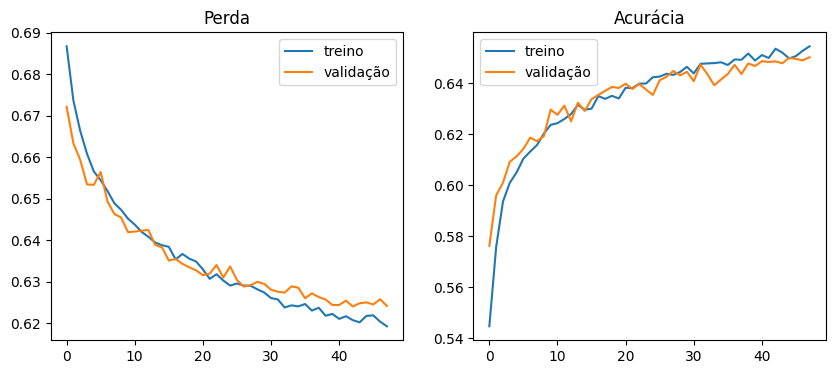

In [31]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='treino')
plt.plot(history.history['val_loss'], label='validação')
plt.title('Perda')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='treino')
plt.plot(history.history['val_accuracy'], label='validação')
plt.title('Acurácia')
plt.legend()
plt.show()

Visualmente podemos ver que as linhas seguem o mesmo caminho e não parece haver qualquer indício de *overfitting*, apenas a função de perda parece apresentar uma leve distância entre treino e validação, mas nada muito relevante, dado que o treinamento foi interrompido antes que qualquer problema pudesse vir a aparecer.

Ao treinar a rede e obter bons resultados, podemos gravar o modelo em um arquivo `.keras` e utilizar ele sempre que precisarmos utilizá-lo sem a necessidade de treinar a rede novamente, pois além de custar tempo, os resultados vão sempre ser relativamente diferentes, não muito distante, pois os parâmetros são os mesmos, mas os resultados vão possuir comportamentos distintos, então para garantir a reprodutibilidade fazemos este procedimento. Para isso fazemos o seguinte: armazenamos o modelo num arquivo nomeado higgs_classifier_keras.keras, fazemos download desse modelo, inserimos em um drive e carregamos ele no Colab, para que qualquer pessoa possa utilizá-lo e definimos o modelo para ser o do download.

In [32]:
model.save("higgs_classifier_keras.keras")
print("Modelo gravado como higgs_classifier_keras.keras")

Modelo gravado como higgs_classifier_keras.keras


Antes de prosseguir, há uma nota a ser feita em relação à esta última ação. Ao executar o código por completo no Google Colab, a rede neural vai ser treinada novamente e os valores que aparecem em cada `epoch`, a acurácia total final e os gráficos de perda e acurácia, vão ser ligeiramente diferentes, então para evitar que sempre que os testes da rede forem ser executados no Colab tenhamos que re-treinar a rede, utilizaremos o modelo salvo no `higgs_classifier_keras.keras`. Portanto, faremos o download deste modelo, inserimos ele em um drive público, fazemos o download dele dentro do Colab utilizando a biblioteca `gdown` e carregamos o modelo via `load_model`.

In [37]:
from tensorflow.keras.models import load_model

gdown.download("https://drive.google.com/uc?id=1QKsAdoLJUO09CdT-6KNYkfLyvcC5yL8o", "higgs_classifier_keras.keras", quiet=True)

model = load_model("higgs_classifier_keras.keras")

Completo o treinamento, o espectro da massa $m_{WWbb}$ pode ser construido para os dados, basta fazer uma simples separação do conjunto `highLevel` em treino e teste para construir esse espectro com as predições de sinal e fundo. Os comandos abaixo são essencialmente para plotar apenas as curvas acima de um histograma (puramente estético e para se parecer mais com o artigo original), então o foco é na predição, onde fazemos com que a probabilidade estimada de que a amostra pertença à classe positiva seja classificada como sinal para valores $>0.5$ e como fundo para $\leqslant 0.5$.

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


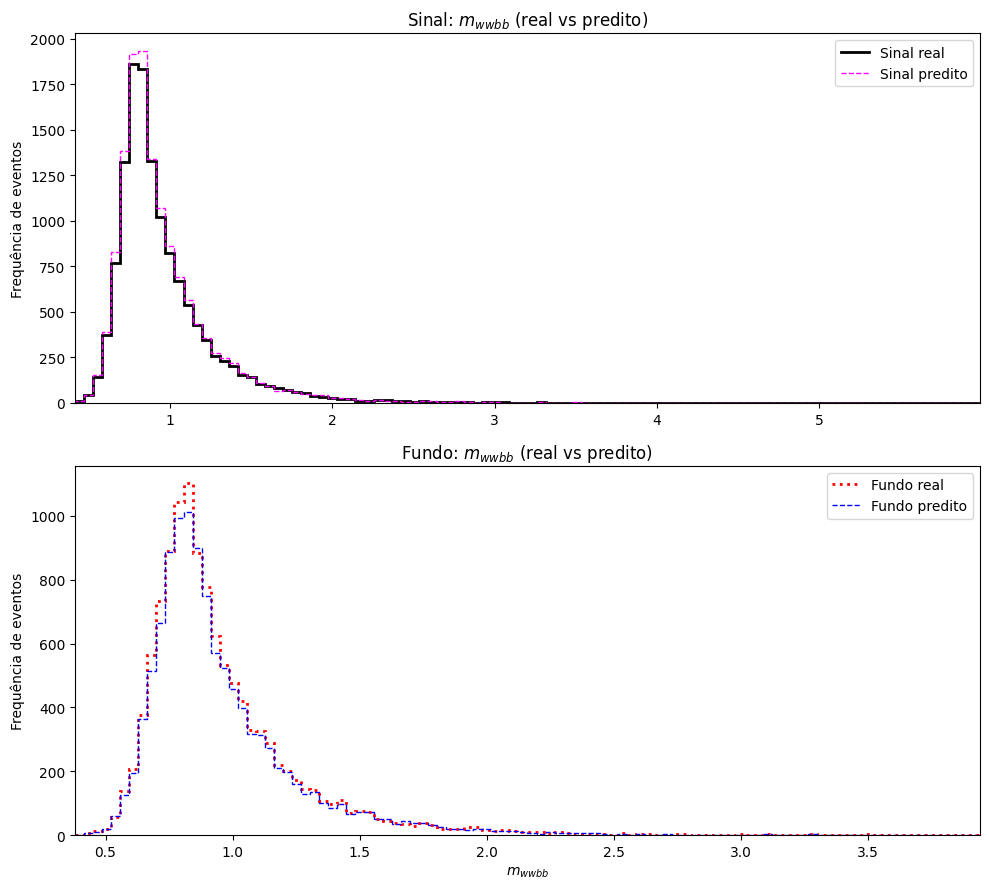

In [40]:
highLevelTrain, highLevelTest = train_test_split(highLevel, test_size=0.25, random_state=42)
mWWbbTest = highLevelTest['m_wwbb'].values

yPredProb = model.predict(XTest)
yPred = (yPredProb > 0.5).astype(int).flatten()

mWWbb = mWWbbTest

mSinalTrue = mWWbb[yTest == 1]
mSinalPred = mWWbb[yPred == 1]

mFundoTrue = mWWbb[yTest == 0]
mFundoPred = mWWbb[yPred == 0]

def make_bins(data):
    vmin = data.min()
    vmax = data.max()
    return np.linspace(vmin, vmax, 101)

fig, (axSinal, axFundo) = plt.subplots(2, 1, figsize=(10, 9), sharex=False)

binsSinal = make_bins(np.concatenate([mSinalTrue, mSinalPred]))
axSinal.hist(mSinalTrue, bins=binsSinal, histtype='step', linewidth=2, color='black', label='Sinal real')
axSinal.hist(mSinalPred, bins=binsSinal, histtype='step', linewidth=1, color='magenta', linestyle='dashed', label='Sinal predito')

axSinal.set_title('Sinal: $m_{wwbb}$ (real vs predito)')
axSinal.set_ylabel('Frequência de eventos')
axSinal.set_xlim(binsSinal[0], binsSinal[-1])

legendaSinal = [
    Line2D([0], [0], color='black', lw=2, label='Sinal real'),
    Line2D([0], [0], color='magenta', lw=1, linestyle='dashed', label='Sinal predito')
]
axSinal.legend(handles=legendaSinal, loc='upper right')

binsFundo = make_bins(np.concatenate([mFundoTrue, mFundoPred]))
axFundo.hist(mFundoTrue, bins=binsFundo, histtype='step', linewidth=2, color='red', linestyle='dotted', label='Fundo real')
axFundo.hist(mFundoPred, bins=binsFundo, histtype='step', linewidth=1, color='blue', linestyle='dashed', label='Fundo predito')

axFundo.set_title('Fundo: $m_{wwbb}$ (real vs predito)')
axFundo.set_xlabel('$m_{wwbb}$')
axFundo.set_ylabel('Frequência de eventos')
axFundo.set_xlim(binsFundo[0], binsFundo[-1])

legendaFundo = [
    Line2D([0], [0], color='red', lw=2, linestyle='dotted', label='Fundo real'),
    Line2D([0], [0], color='blue', lw=1, linestyle='dashed', label='Fundo predito')
]
axFundo.legend(handles=legendaFundo, loc='upper right')

plt.tight_layout()
plt.show()

Por fim, para verificar o quão bom são os resultados obtidos a partir do treinamento da rede, podemos utilizar a função `classification_report` do `sklearn` para obter as principais métricas que são a precisão, recall, f1-score e a acurácia que já obtivemos no final do treinamento. Essa função vai nos fornecer alguns resultados a mais, mas não daremos atenção à elas, apenas às principais comentadas anteriormente.

In [41]:
from sklearn.metrics import classification_report

print(classification_report(yTest, yPred))

              precision    recall  f1-score   support

         0.0       0.63      0.60      0.61     11792
         1.0       0.65      0.68      0.67     13208

    accuracy                           0.64     25000
   macro avg       0.64      0.64      0.64     25000
weighted avg       0.64      0.64      0.64     25000



Obtemos então para o fundo valores de precisão de $\approx 63\%$, um recall de $\approx 60\%$ e um f1-score $\approx 61\%$, o que são valores muito bons levando em conta que usamos uma rede multicamadas de perceptrons simples. O mesmo vale pro caso de sinal, onde os valores de precisão ($\approx 65\%$), recall ($\approx 68\%$) e f1-score ($\approx 67\%$) fornecem valores relativamente altos e indicam um bom resultado da predição. Além destas métricas, podemos construir uma curva ROC e determinar a área abaixo desta curva(AUC).

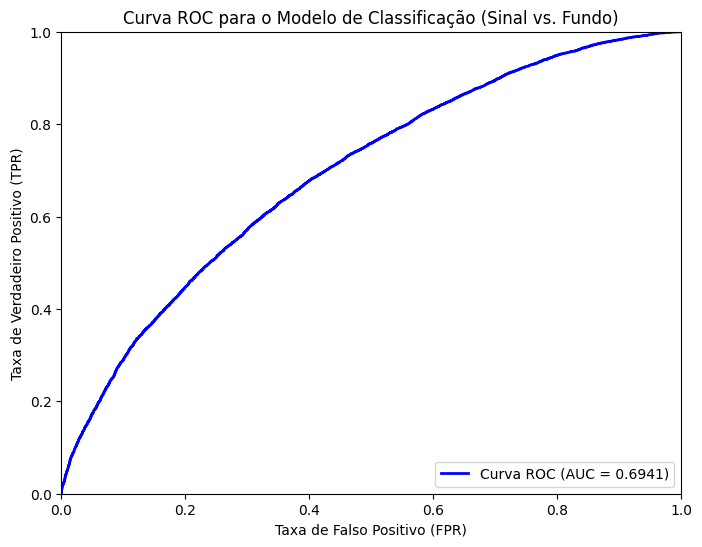

In [42]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(yTest, yPredProb.flatten())
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Curva ROC (AUC = {roc_auc:.4f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Taxa de Falso Positivo (FPR)')
plt.ylabel('Taxa de Verdadeiro Positivo (TPR)')
plt.title('Curva ROC para o Modelo de Classificação (Sinal vs. Fundo)')
plt.legend(loc='lower right')
plt.show()

O resultado de $\text{AUC} \approx 0.69$ pode ser considerado muito bom, levando em conta que quanto mais próximo de 1, melhor é o modelo. Além disso, ao olhar para o artigo original, a figura suplementar 1.(a) apresenta um gráfico similar à este, cujo valor de AUC utilizando redes neurais foi de $\text{AUC} = 0.73$, concluindo que os resultados obtidos pela rede neural aqui construída são bons o suficiente para extrair a física de interesse.